In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [5]:
data = pd.read_csv('Market_Basket.csv', header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


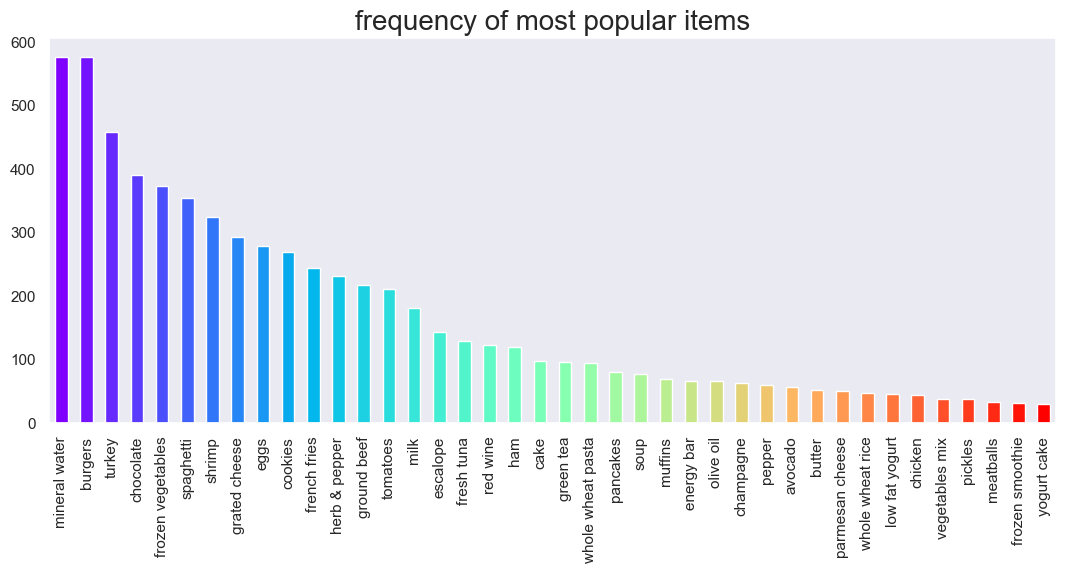

In [8]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [24]:
import networkx as nx
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

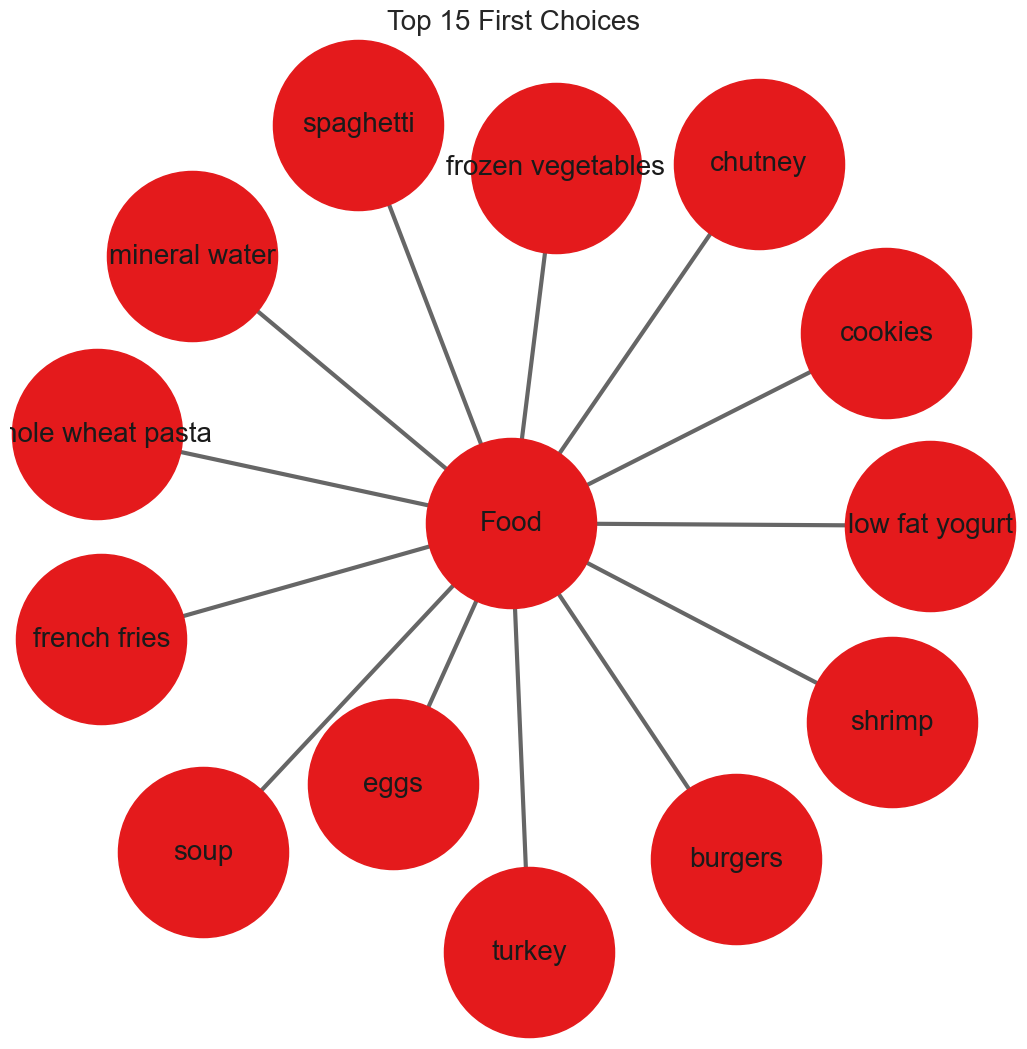

In [10]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [11]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [12]:
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil',
  'Food']]

In [13]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [14]:
print('# of items:',len(items))
print(list(items))

# of items: 122
['spaghetti', 'sandwich', ' asparagus', 'olive oil', 'fromage blanc', 'dessert wine', 'corn', 'ground beef', 'tomatoes', 'champagne', 'pickles', 'brownies', 'pet food', 'mint', 'barbecue sauce', 'bramble', 'honey', 'melons', 'whole weat flour', 'white wine', 'gluten free bar', 'ketchup', 'oatmeal', 'pepper', 'zucchini', 'frozen vegetables', 'fresh bread', 'shrimp', 'cottage cheese', 'tomato juice', 'ham', 'pancakes', 'light mayo', 'soup', 'body spray', 'whole wheat pasta', 'escalope', 'cauliflower', 'salt', 'strong cheese', 'protein bar', 'green tea', 'mayonnaise', 'burgers', 'chili', 'french fries', 'sparkling water', 'carrots', 'red wine', 'cereals', 'burger sauce', 'cider', 'hand protein bar', 'bug spray', 'frozen smoothie', 'blueberries', 'gums', 'water spray', 'vegetables mix', 'fresh tuna', 'yams', 'magazines', 'black tea', 'french wine', 'shallot', 'chutney', 'tomato sauce', 'low fat yogurt', 'candy bars', 'cooking oil', 'green grapes', 'herb & pepper', 'green be

In [15]:
if 'nan' in items: items.remove('nan')
print(list(items))

['spaghetti', 'sandwich', ' asparagus', 'olive oil', 'fromage blanc', 'dessert wine', 'corn', 'ground beef', 'tomatoes', 'champagne', 'pickles', 'brownies', 'pet food', 'mint', 'barbecue sauce', 'bramble', 'honey', 'melons', 'whole weat flour', 'white wine', 'gluten free bar', 'ketchup', 'oatmeal', 'pepper', 'zucchini', 'frozen vegetables', 'fresh bread', 'shrimp', 'cottage cheese', 'tomato juice', 'ham', 'pancakes', 'light mayo', 'soup', 'body spray', 'whole wheat pasta', 'escalope', 'cauliflower', 'salt', 'strong cheese', 'protein bar', 'green tea', 'mayonnaise', 'burgers', 'chili', 'french fries', 'sparkling water', 'carrots', 'red wine', 'cereals', 'burger sauce', 'cider', 'hand protein bar', 'bug spray', 'frozen smoothie', 'blueberries', 'gums', 'water spray', 'vegetables mix', 'fresh tuna', 'yams', 'magazines', 'black tea', 'french wine', 'shallot', 'chutney', 'tomato sauce', 'low fat yogurt', 'candy bars', 'cooking oil', 'green grapes', 'herb & pepper', 'green beans', 'babies fo

In [16]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 14520
[('spaghetti', 'sandwich'), ('spaghetti', ' asparagus'), ('spaghetti', 'olive oil'), ('spaghetti', 'fromage blanc'), ('spaghetti', 'dessert wine')]


In [17]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,asparagus,Food,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [18]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Food,1.000000
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911


In [19]:
support.describe()

,support
count,121.000000
mean,0.040611
std,0.097542
min,0.000133
25%,0.007732
50%,0.015731
75%,0.042528
max,1.000000


In [20]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['burgers'], onehot['mineral water']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['french fries'], onehot['mineral water']).mean()

# Print support values
print("burgers and french fries: %.2f" % supportBF)
print("burgers and mineral water: %.2f" % supportBM)
print("french fries and mineral water: %.2f" % supportFM)

burgers and french fries: 0.02
burgers and mineral water: 0.02
french fries and mineral water: 0.03


In [21]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['mineral water+french fries'] = np.logical_and(onehot['mineral water'], onehot['french fries'])

# Compute the support
support = onehot.mean()
val = support.loc['mineral water+french fries']

# Print the support values
print(f'mineral water+french fries support = {val}')

mineral water+french fries support = 0.03372883615517931


In [22]:
# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['mineral water'], onehot['french fries']).mean()

# Compute support for mineral water
supportM = onehot['mineral water'].mean()

# Compute support for french fries
supportF = onehot['french fries'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('mineral water = {0:.2f}, french fries = {1:.2f}'.format(confidenceMM, confidenceMF))

mineral water = 0.14, french fries = 0.20


In [23]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 0.83
